# Tarea 1: Pipeline
### Daniel Vallejo Aldana

In [1]:
import numpy as np
import cv2
import StructElements as se
import matplotlib.pyplot as plt
import utils

In [2]:
disco=se.Disk(shape=(21,21),invert=False)
diamante=se.Diamond(shape=(21,21),invert=False)

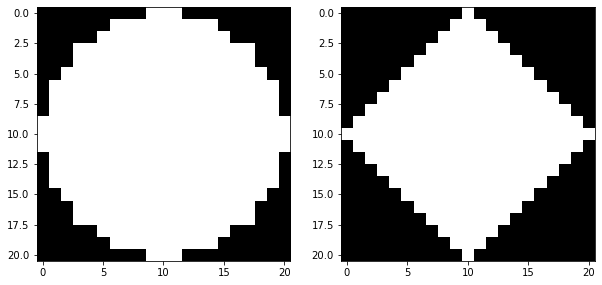

In [3]:
#Elementos estructurantes
fig, ax=plt.subplots(1,2,figsize=(10,15))
ax[0].imshow(disco,cmap='gray')
ax[1].imshow(diamante,cmap='gray')

In [4]:
TRAIN,TEST=utils.train_test_split()

In [6]:
img=se.EQMethod(TRAIN[1][0],se=diamante,iterations=100,filtro=None,gt=TRAIN[1][1],read_binary=False)
gt=cv2.imread(TRAIN[1][1],0)
ori=cv2.imread(TRAIN[1][0],0)
fig,ax=plt.subplots(1,3,figsize=(15,19))
ax[0].imshow(ori,cmap='gray')
ax[1].imshow(img,cmap='gray')
ax[2].imshow(gt,cmap='gray')

In [7]:
se.EvaluateMetrics(img,gt)

{'acc': 0.5266333333333333,
 'prec': 0.9023444711094701,
 'spec': 0.9877085366420373,
 'jaccard': 0.10292476469225748,
 'roc': 0.5458963448935666}

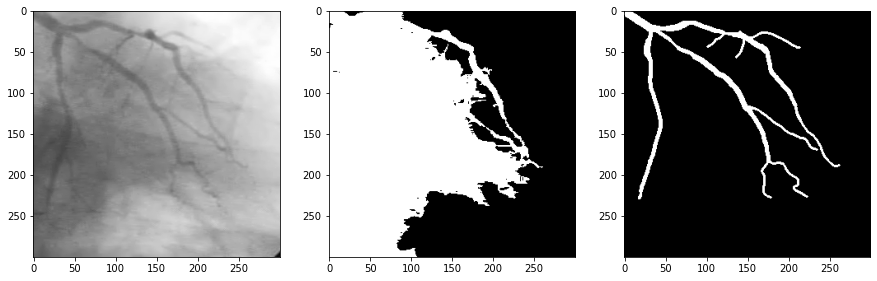

In [13]:
img=se.EQMethod(TRAIN[1][0],se=disco,iterations=100,filtro='otsu',read_binary=False,gt=TRAIN[1][1])
gt=cv2.imread(TRAIN[1][1],0)
ori=cv2.imread(TRAIN[1][0],0)
fig,ax=plt.subplots(1,3,figsize=(15,19))
ax[0].imshow(ori,cmap='gray')
ax[1].imshow(img,cmap='gray')
ax[2].imshow(gt,cmap='gray')

In [9]:
se.EvaluateMetrics(img,gt)

{'acc': 0.9330666666666667,
 'prec': 0.521321764814473,
 'spec': 0.9690369574302944,
 'jaccard': 0.3191681735985534,
 'roc': 0.7102578871883686}

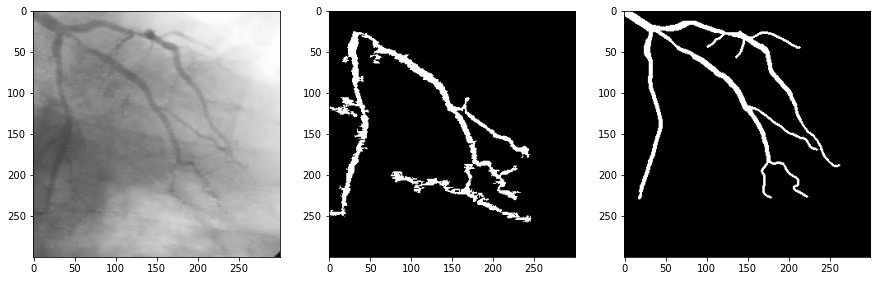

In [10]:
img=se.EQMethod(TRAIN[1][0],se=disco,iterations=100,filtro='adapt',gt=TRAIN[1][1],read_binary=False)
gt=cv2.imread(TRAIN[1][1],0)
ori=cv2.imread(TRAIN[1][0],0)
fig,ax=plt.subplots(1,3,figsize=(15,19))
ax[0].imshow(ori,cmap='gray')
ax[1].imshow(img,cmap='gray')
ax[2].imshow(gt,cmap='gray')

In [11]:
se.EvaluateMetrics(img,gt)

{'acc': 0.9330666666666667,
 'prec': 0.521321764814473,
 'spec': 0.9690369574302944,
 'jaccard': 0.3191681735985534,
 'roc': 0.7102578871883686}

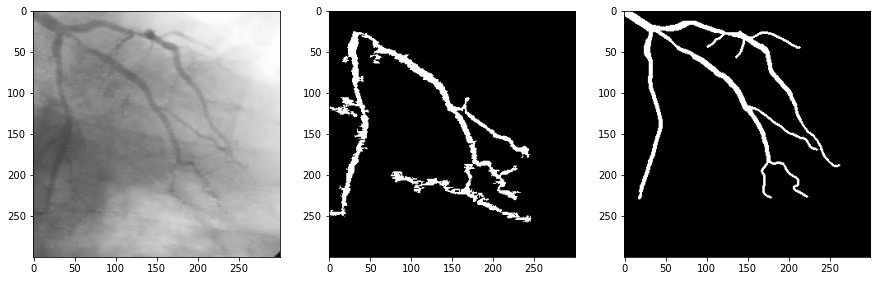

In [12]:
img=se.EQMethod(TRAIN[1][0],se=diamante,iterations=100,filtro='adapt',gt=TRAIN[1][1])
gt=cv2.imread(TRAIN[1][1],0)
ori=cv2.imread(TRAIN[1][0],0)
fig,ax=plt.subplots(1,3,figsize=(15,19))
ax[0].imshow(ori,cmap='gray')
ax[1].imshow(img,cmap='gray')
ax[2].imshow(gt,cmap='gray')

In [60]:
se.EvaluateMetrics(img,gt)

{'acc': 0.9628666666666666,
 'prec': 0.9433962264150944,
 'spec': 0.997518431936702,
 'jaccard': 0.5079505300353356,
 'roc': 0.7607182136904467}

# Evaluación sobre el conjunto de entenamiento

## Filtro Global Threshold con SE de disco

In [28]:
size=0
toAdd=np.zeros(5)
for i,t in enumerate(TRAIN):
    try:
        img=se.EQMethod(t[0],se=disco,iterations=100,filtro=None,gt=t[1])
        gt=cv2.imread(t[1],0)
        metricas=se.EvaluateMetrics(img,gt,asdict=False)
        toAdd=toAdd+metricas
        size+=1
    except:
        pass
toAdd=toAdd/size
print(toAdd)

[0.62942713 0.74533723 0.97747457 0.13087023 0.56840184]


## Filtro Global Threshold con SE de disco

In [29]:
size=0
toAdd=np.zeros(5)
for i,t in enumerate(TRAIN):
    try:
        img=se.EQMethod(t[0],se=disco,iterations=100,filtro=None,gt=t[1])
        gt=cv2.imread(t[1],0)
        metricas=se.EvaluateMetrics(img,gt,asdict=False)
        toAdd=toAdd+metricas
        size+=1
    except:
        pass
toAdd=toAdd/size
print(toAdd)

[0.62880737 0.73785418 0.97717617 0.12861512 0.571959  ]


## Filtro de Otsu y binarización con SE de disco (baseline)

In [30]:
size=0
toAdd=np.zeros(5)
for i,t in enumerate(TRAIN):
    try:
        img=se.EQMethod(t[0],se=disco,iterations=100,filtro='otsu',gt=t[1])
        gt=cv2.imread(t[1],0)
        metricas=se.EvaluateMetrics(img,gt,asdict=False)
        toAdd=toAdd+metricas
        size+=1
    except:
        pass
toAdd=toAdd/size
print(toAdd)

[0.64187158 0.57933308 0.96786305 0.12392668 0.5626911 ]


## Filtro de Otsu y binarización con SE de diamante

In [31]:
size=0
toAdd=np.zeros(5)
for i,t in enumerate(TRAIN):
    try:
        img=se.EQMethod(t[0],se=diamante,iterations=100,filtro='otsu',gt=t[1])
        gt=cv2.imread(t[1],0)
        metricas=se.EvaluateMetrics(img,gt,asdict=False)
        toAdd=toAdd+metricas
        size+=1
    except:
        pass
toAdd=toAdd/size
print(toAdd)

[0.64349287 0.59021144 0.96878653 0.12854304 0.56915175]


## Filtro adaptativo de media y binarización con SE de disco

In [32]:
size=0
toAdd=np.zeros(5)
for i,t in enumerate(TRAIN):
    try:
        img=se.EQMethod(t[0],se=disco,iterations=100,filtro='adapt',gt=t[1])
        gt=cv2.imread(t[1],0)
        metricas=se.EvaluateMetrics(img,gt,asdict=False)
        toAdd=toAdd+metricas
        size+=1
    except:
        pass
toAdd=toAdd/size
print(toAdd)

[0.91323544 0.7645527  0.985664   0.38550586 0.72519418]


## Filtro adaptativo de media y binarización con SE de diamante

In [33]:
size=0
toAdd=np.zeros(5)
for i,t in enumerate(TRAIN):
    try:
        img=se.EQMethod(t[0],se=disco,iterations=100,filtro='adapt',gt=t[1])
        gt=cv2.imread(t[1],0)
        metricas=se.EvaluateMetrics(img,gt,asdict=False)
        toAdd=toAdd+metricas
        size+=1
    except:
        pass
toAdd=toAdd/size
print(toAdd)

[0.91202117 0.78245131 0.98635301 0.39214283 0.72534316]


# Encontrar el tamaño óptimo del filtro para binarizado 

In [34]:
possible_sizes=[i for i in range(26) if i>=3 and i %2 ==1 ]

## Filtro Global Threshold y SE de disco (baseline)

In [35]:
max_acc=0.0
optimal=-1
for Tm in possible_sizes:
    StrEl=se.Disk(shape=(Tm,Tm))
    size=0
    toAdd=np.zeros(5)
    for i,t in enumerate(TRAIN):
        try:
            img=se.EQMethod(t[0],se=StrEl,iterations=100,filtro=None,gt=t[1])
            gt=cv2.imread(t[1],0)
            metricas=se.EvaluateMetrics(img,gt,asdict=False)
            toAdd=toAdd+metricas
            size+=1
        except:
            pass
    toAdd=toAdd/size
    if toAdd[0]>max_acc:
        max_acc=toAdd[0]
        optimal=Tm
print("Tamano Optimo de Kernel de disco: {}".format(optimal))

Tamano Optimo de Kernel de disco: 3


## Filtro Global Threshold y SE de diamantes

In [36]:
max_acc=0.0
optimal=-1
for Tm in possible_sizes:
    StrEl=se.Disk(shape=(Tm,Tm))
    size=0
    toAdd=np.zeros(5)
    for i,t in enumerate(TRAIN):
        try:
            img=se.EQMethod(t[0],se=StrEl,iterations=100,filtro=None,gt=t[1])
            gt=cv2.imread(t[1],0)
            metricas=se.EvaluateMetrics(img,gt,asdict=False)
            toAdd=toAdd+metricas
            size+=1
        except:
            pass
    toAdd=toAdd/size
    if toAdd[0]>max_acc:
        max_acc=toAdd[0]
        optimal=Tm
print("Tamano Optimo de Kernel de disco: {}".format(optimal))

Tamano Optimo de Kernel de disco: 3


## Filtro de Otsu y binarización con SE de disco 

In [37]:
max_acc=0.0
optimal=-1
for Tm in possible_sizes:
    StrEl=se.Disk(shape=(Tm,Tm))
    size=0
    toAdd=np.zeros(5)
    for i,t in enumerate(TRAIN):
        try:
            img=se.EQMethod(t[0],se=StrEl,iterations=100,filtro='otsu',gt=t[1])
            gt=cv2.imread(t[1],0)
            metricas=se.EvaluateMetrics(img,gt,asdict=False)
            toAdd=toAdd+metricas
            size+=1
        except:
            pass
    toAdd=toAdd/size
    if toAdd[0]>max_acc:
        max_acc=toAdd[0]
        optimal=Tm
print("Tamano Optimo de Kernel de disco: {}".format(optimal))

Tamano Optimo de Kernel de disco: 9


## Filtro de Otsu y binarización con SE de diamante

In [38]:
max_acc=0.0
optimal=-1
for Tm in possible_sizes:
    StrEl=se.Diamond(shape=(Tm,Tm))
    size=0
    toAdd=np.zeros(5)
    for i,t in enumerate(TRAIN):
        try:
            img=se.EQMethod(t[0],se=StrEl,iterations=100,filtro='otsu',gt=t[1])
            gt=cv2.imread(t[1],0)
            metricas=se.EvaluateMetrics(img,gt,asdict=False)
            toAdd=toAdd+metricas
            size+=1
        except:
            pass
    toAdd=toAdd/size
    if toAdd[0]>max_acc:
        max_acc=toAdd[0]
        optimal=Tm
print("Tamano Optimo de Kernel de Diamante: {}".format(optimal))

Tamano Optimo de Kernel de Diamante: 21


## Filtro adaptativo de media y SE de disco

In [39]:
max_acc=0.0
optimal=-1
for Tm in possible_sizes:
    StrEl=se.Disk(shape=(Tm,Tm))
    size=0
    toAdd=np.zeros(5)
    for i,t in enumerate(TRAIN):
        try:
            img=se.EQMethod(t[0],se=StrEl,iterations=100,filtro='adapt',gt=t[1])
            gt=cv2.imread(t[1],0)
            metricas=se.EvaluateMetrics(img,gt,asdict=False)
            toAdd=toAdd+metricas
            size+=1
        except:
            pass
    toAdd=toAdd/size
    if toAdd[0]>max_acc:
        max_acc=toAdd[0]
        optimal=Tm
print("Tamano Optimo de Kernel de disco: {}".format(optimal))

Tamano Optimo de Kernel de disco: 9


## Filtro adaptativo de media y SE de diamante

In [40]:
max_acc=0.0
optimal=-1
for Tm in possible_sizes:
    StrEl=se.Diamond(shape=(Tm,Tm))
    size=0
    toAdd=np.zeros(5)
    for i,t in enumerate(TRAIN):
        try:
            img=se.EQMethod(t[0],se=StrEl,iterations=100,filtro='adapt',gt=t[1])
            gt=cv2.imread(t[1],0)
            metricas=se.EvaluateMetrics(img,gt,asdict=False)
            toAdd=toAdd+metricas
            size+=1
        except:
            pass
    toAdd=toAdd/size
    if toAdd[0]>max_acc:
        max_acc=toAdd[0]
        optimal=Tm
print("Tamano Optimo de Kernel de disco: {}".format(optimal))

Tamano Optimo de Kernel de disco: 13


# Evaluación de los diferentes tamaños de elementos estructurantes con los diferentes filtro

## Filtro de Global Threshold y disco de 3x3

In [51]:
#Aquí va la evaluaión del conjunto de prueba
size=0
toAdd=np.zeros(5)
disco=se.Disk(shape=(3,3))
for i,t in enumerate(TEST):
    try:
        img=se.EQMethod(t[0],se=disco,iterations=100,filtro=None,gt=t[1])
        gt=cv2.imread(t[1],0)
        metricas=se.EvaluateMetrics(img,gt,asdict=False)
        toAdd=toAdd+metricas
        size+=1
    except:
        pass
toAdd=toAdd/size
toAdd=[round(t,4) for t in toAdd]
print(toAdd)

[0.6036, 0.7707, 0.978, 0.1415, 0.5684]


## Filtro de Global Threshold y diamante de 3x3

In [52]:
#Aquí va la evaluaión del conjunto de prueba
size=0
toAdd=np.zeros(5)
disco=se.Diamond(shape=(3,3))
for i,t in enumerate(TEST):
    try:
        img=se.EQMethod(t[0],se=disco,iterations=100,filtro=None,gt=t[1])
        gt=cv2.imread(t[1],0)
        metricas=se.EvaluateMetrics(img,gt,asdict=False)
        toAdd=toAdd+metricas
        size+=1
    except:
        pass
toAdd=toAdd/size
toAdd=[round(t,4) for t in toAdd]
print(toAdd)

[0.4629, 0.8139, 0.9774, 0.0764, 0.5275]


## Filtro de OTSU y disco de 9x9

In [53]:
#Aquí va la evaluaión del conjunto de prueba
size=0
toAdd=np.zeros(5)
disco=se.Disk(shape=(9,9))
for i,t in enumerate(TEST):
    try:
        img=se.EQMethod(t[0],se=disco,iterations=100,filtro='otsu',gt=t[1])
        gt=cv2.imread(t[1],0)
        metricas=se.EvaluateMetrics(img,gt,asdict=False)
        toAdd=toAdd+metricas
        size+=1
    except:
        pass
toAdd=toAdd/size
toAdd=[round(t,4) for t in toAdd]
print(toAdd)

[0.5772, 0.6926, 0.9758, 0.0984, 0.5528]


## Filtro de OTSU y SE de diamante de tamaño 21x21

In [54]:
#Aquí va la evaluaión del conjunto de prueba
size=0
toAdd=np.zeros(5)
disco=se.Diamond(shape=(9,9))
for i,t in enumerate(TEST):
    try:
        img=se.EQMethod(t[0],se=disco,iterations=100,filtro='otsu',gt=t[1])
        gt=cv2.imread(t[1],0)
        metricas=se.EvaluateMetrics(img,gt,asdict=False)
        toAdd=toAdd+metricas
        size+=1
    except:
        pass
toAdd=toAdd/size
toAdd=[round(t,4) for t in toAdd]
print(toAdd)

[0.5603, 0.7113, 0.9757, 0.1004, 0.5462]


## Filtro adaptativo y SE de disco de tamaño 9x9

In [55]:
#Aquí va la evaluaión del conjunto de prueba
size=0
toAdd=np.zeros(5)
disco=se.Disk(shape=(25,25))
for i,t in enumerate(TEST):
    try:
        img=se.EQMethod(t[0],se=disco,iterations=100,filtro='adapt',gt=t[1])
        gt=cv2.imread(t[1],0)
        metricas=se.EvaluateMetrics(img,gt,asdict=False)
        toAdd=toAdd+metricas
        size+=1
    except:
        pass
toAdd=toAdd/size
toAdd=[round(t,4) for t in toAdd]
print(toAdd)

[0.9124, 0.7897, 0.9869, 0.3843, 0.7219]


## Filtro adaptativo y SE de diamante de tamaño 13x13

In [56]:
#Aquí va la evaluaión del conjunto de prueba
size=0
toAdd=np.zeros(5)
disco=se.Diamond(shape=(13,13))
for i,t in enumerate(TEST):
    try:
        img=se.EQMethod(t[0],se=disco,iterations=100,filtro='adapt',gt=t[1])
        gt=cv2.imread(t[1],0)
        metricas=se.EvaluateMetrics(img,gt,asdict=False)
        toAdd=toAdd+metricas
        size+=1
    except:
        pass
toAdd=toAdd/size
toAdd=[round(t,4) for t in toAdd]
print(toAdd)

[0.9291, 0.8191, 0.9884, 0.4239, 0.739]
